## Heart Failure Survival Analysis & Mortality Prediction Modelling 

#### * Not completed yet - will be finished in the next days

### Import Data

In [2]:
import pandas as pd
import numpy as np
import os

url='https://raw.githubusercontent.com/ErezWasserman/Heart-Failure-Prediction/main/heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(url)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


#### Note: Features explanation and units/measurements can be found [here](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/1).

### EDA & Visualization

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

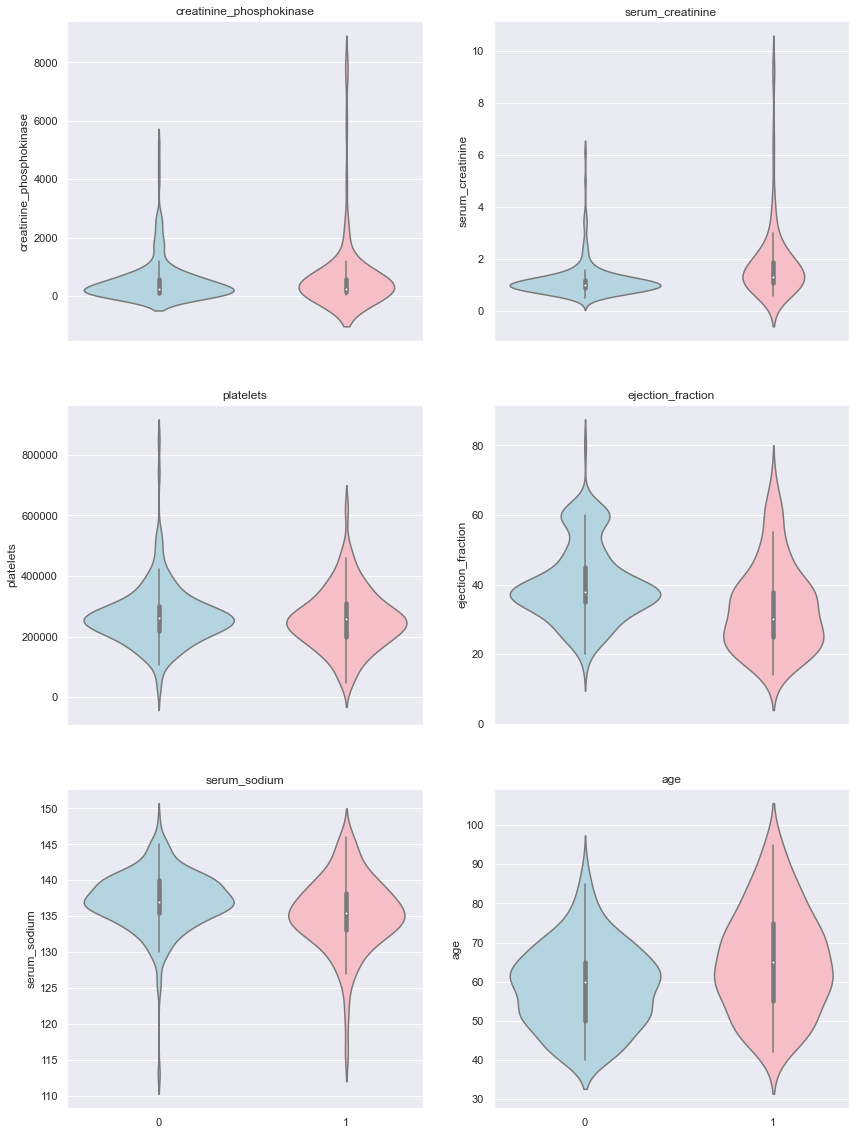

In [6]:
headers = list(data.keys())
target_features = ['time', 'DEATH_EVENT']
category_features = ['anaemia', 'smoking', 'diabetes', 'sex', 'high_blood_pressure']

def set_approach(a,b):
    return list(set(a)-set(b))

numeric_features = set_approach(headers, target_features + category_features)
# print(numeric_features)

fig, axes = plt.subplots(round((len(numeric_features))/2),2, figsize=(14,20), sharex="col")  # sharey="row"

for i, j in enumerate(numeric_features):
    row = int(i/2)
    col = int(i%2)
    # print('{}: {},{}'.format(i, int(i/2), int(i%2)))
    
    sns.violinplot(x="DEATH_EVENT", y=j, data=data, palette=["lightblue", "lightpink"], order=[0, 1], ax=axes[row, col])
    axes[row,col].set_xlabel('')
    axes[row,col].autoscale()
    axes[row,col].set_title(j)
plt.show()

## Survival Analysis

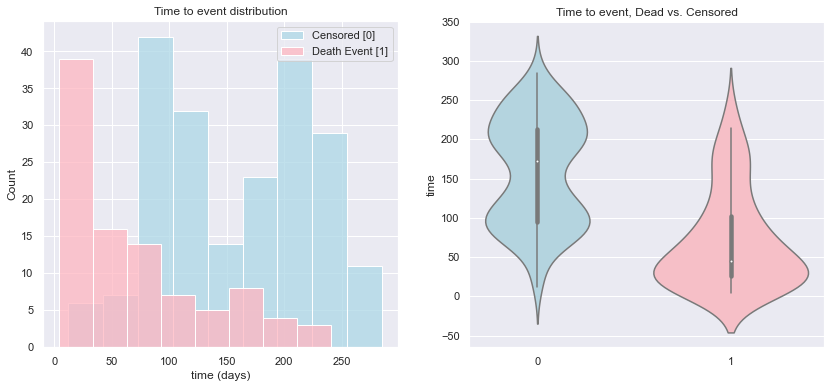

In [18]:
fig, axes = plt.subplots(1,2, figsize=(14,6))  # sharex="col", sharey="row"

sns.histplot(data.query("DEATH_EVENT==0")['time'], color="lightblue", label="Censored [0]",ax=axes[0])
sns.histplot(data.query("DEATH_EVENT==1")['time'], color="lightpink", label="Death Event [1]",ax=axes[0])
axes[0].legend()
axes[0].set_xlabel('time (days)')
axes[0].set_title('Time to event distribution')
axes[0].autoscale()

sns.violinplot(x="DEATH_EVENT", y='time', data=data, palette=["lightblue", "lightpink"], order=[0, 1], ax=axes[1])
axes[1].set_xlabel('')
axes[1].autoscale()
axes[1].set_title('Time to event, Dead vs. Censored')

plt.show()

##  Survival Curve Estimations using Kaplan-Meier Estimate: <br><br>  $\hat{S}$ $(t)$ $=$ $\prod_{i: t_i \le t}$ $\frac{n_i - d_i}{n_i}$ 

#### Where: <br> ${n_i}$ - the population at risk at time just prior to time ${t_i}$ <bR> ${d_i}$ - the number of events occurred at time ${t_i}$ 

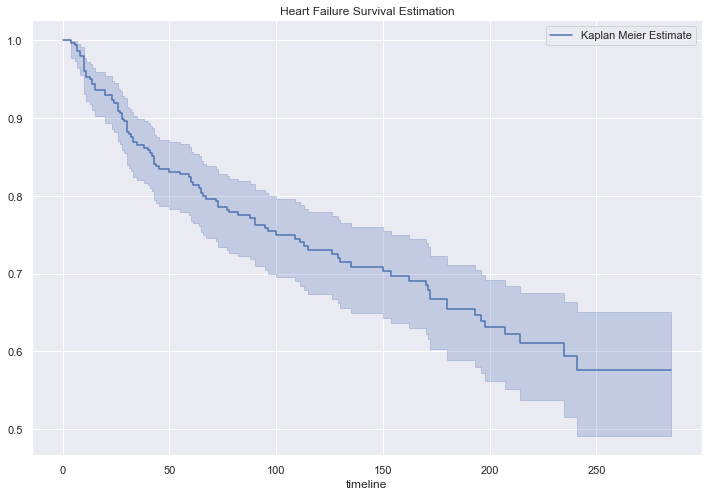

In [19]:
from lifelines import KaplanMeierFitter
T = data['time']
E = data['DEATH_EVENT']

kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E, label='Kaplan Meier Estimate')

plt.figure(figsize=(12,8))
kmf.plot_survival_function()  
plt.title('Heart Failure Survival Estimation');

How to interpret the curve? <br> The probability that time to event >= 4 days is 1.0 <br> The probability that time to event >= 241 days is ~0.58

### Comparing Cohort's Survival Curves Estimations

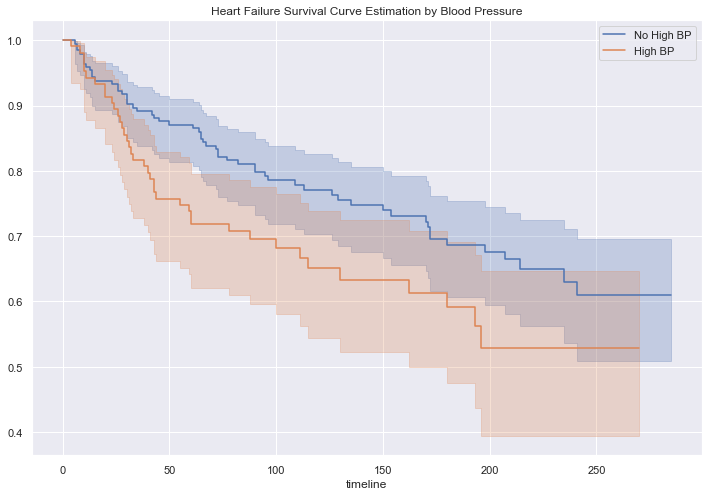

In [20]:
# Example for one binary feature: High Blood Pressure (0: No, 1: Yes) 

kmf1 = KaplanMeierFitter()
feat = (data['high_blood_pressure'] == 0)
plt.figure(figsize=(12,8))

kmf1.fit(T[feat], event_observed=E[feat], label='No High BP')
ax = kmf1.plot()

kmf1.fit(T[~feat], event_observed=E[~feat], label='High BP')
kmf1.plot(ax=ax)

plt.title('Heart Failure Survival Curve Estimation by Blood Pressure');

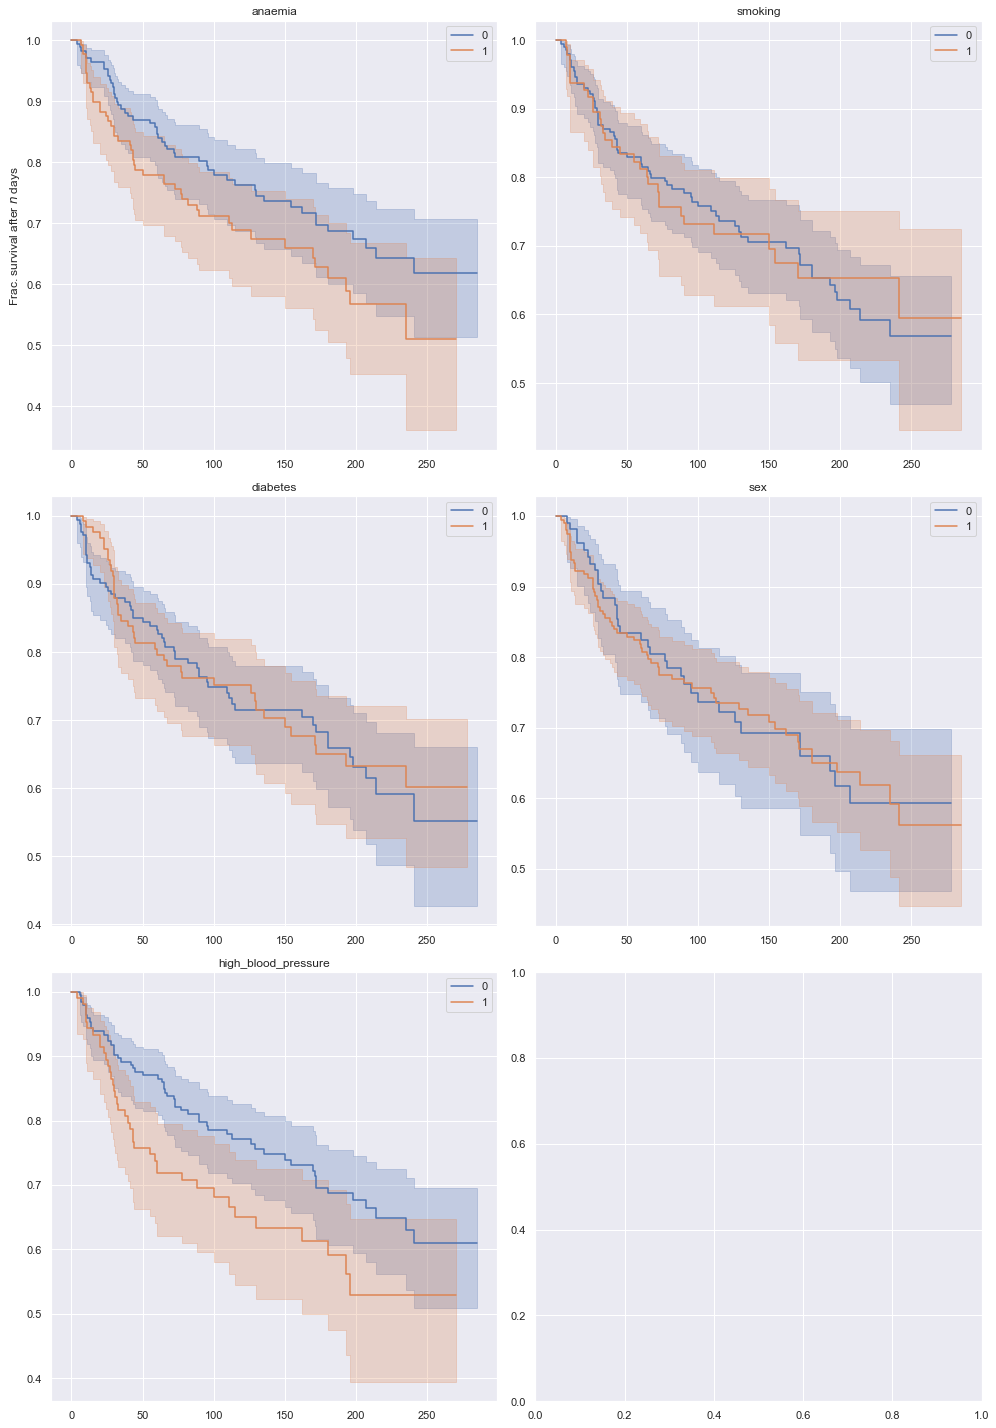

In [21]:
compared_feat = ['anaemia', 'smoking', 'diabetes', 'sex', 'high_blood_pressure']
kmf1 = KaplanMeierFitter()

fig, axes = plt.subplots(3,2, figsize=(14,20), sharex="col")  # sharey="row"

for i, feature in enumerate(compared_feat):
    ax = plt.subplot(3, 2, i + 1)

    ix = data[feature] == 0
    kmf1.fit(T[ix], event_observed=E[ix], label='0')
    kmf1.plot_survival_function(ax=ax)  # , legend=False
    
    kmf1.fit(T[~ix], event_observed=E[~ix], label='1')
    kmf1.plot(ax=ax)
 
    plt.title(feature)
    plt.xlabel('')
    plt.autoscale()

    if i==0:
        plt.ylabel('Frac. survival after $n$ days')

plt.tight_layout()

## Hazard Rates Estimations using Nelson-Aalen Estimate:

          NA_estimate
timeline             
0.0          0.000000
4.0          0.003344
6.0          0.006700
7.0          0.013446
8.0          0.020237


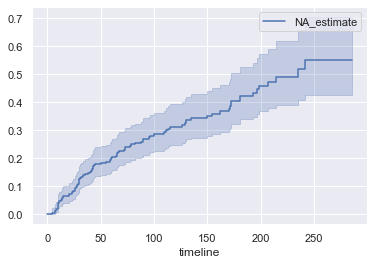

In [22]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()

naf.fit(T, event_observed=E)

print(naf.cumulative_hazard_.head())
naf.plot_cumulative_hazard();

## Cox Proportional Hazard Model

In [23]:
from lifelines import CoxPHFitter
data_r = data.loc[:,['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']]
data_r.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [24]:
# Using Cox Proportional Hazards model
cph = CoxPHFitter()   
cph.fit(data_r, 'time', event_col='DEATH_EVENT')   
cph.print_summary()   

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
      baseline estimation = breslow
   number of observations = 299
number of events observed = 96
   partial log-likelihood = -468.23
         time fit was run = 2021-02-14 09:49:20 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
age                        0.05       1.05       0.01             0.03             0.06                 1.03                 1.07
anaemia                    0.46       1.58       0.22             0.04             0.89                 1.04                 2.42
creatinine_phosphokinase   0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
diabetes                   0.14       1.15       0.22            -0.30             0.58                 0.74                 1.78
ejection_fraction         -0.05       0.95       0.01            -0.07            -0.03                 0.93                 0.97
high_blood_pressure        0.48       1.61       0.22             0.05             0.90                 1.05                 2.46
platelets                 -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
serum_creatinine           0.32       1.38       0.07             0.18             0.46                 1.20                 1.58
serum_sodium              -0.04       0.96       0.02            -0.09             0.00                 0.91                 1.00
sex                       -0.24       0.79       0.25            -0.73             0.26                 0.48                 1.29
smoking                    0.13       1.14       0.25            -0.36             0.62                 0.70                 1.86

                             z      p   -log2(p)
covariate                                       
age                       4.98 <0.005      20.56
anaemia                   2.12   0.03       4.89
creatinine_phosphokinase  2.23   0.03       5.26
diabetes                  0.63   0.53       0.91
ejection_fraction        -4.67 <0.005      18.35
high_blood_pressure       2.20   0.03       5.17
platelets                -0.41   0.68       0.56
serum_creatinine          4.58 <0.005      17.68
serum_sodium             -1.90   0.06       4.12
sex                      -0.94   0.35       1.53
smoking                   0.51   0.61       0.72
---
Concordance = 0.74
Partial AIC = 958.46
log-likelihood ratio test = 81.95 on 11 df
-log2(p) of ll-ratio test = 40.56

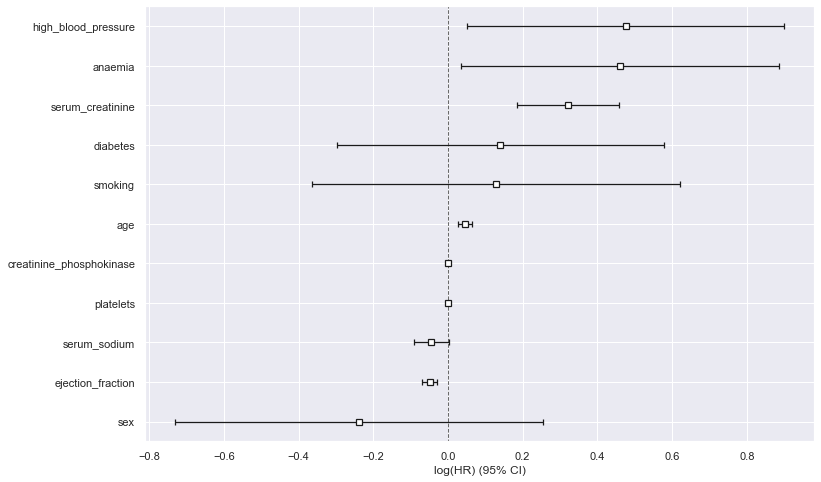

In [25]:
plt.figure(figsize=(12,8))
cph.plot();

### Predicting Survival of individual patients based on their specific measures

In [26]:
tr_rows = data_r.iloc[5:10, 0:-2]
tr_rows

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1


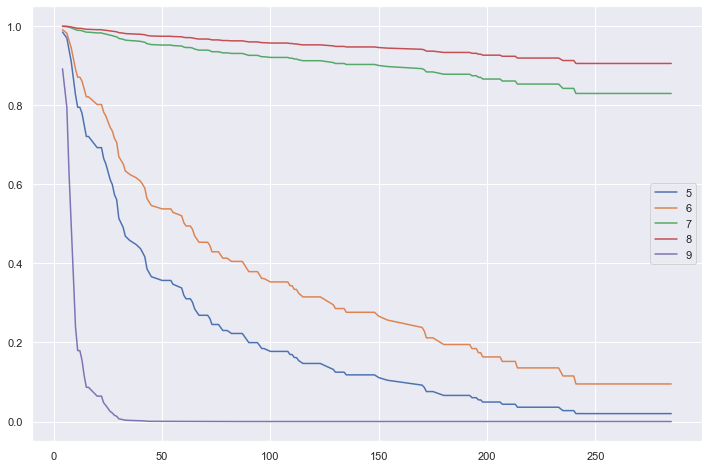

In [27]:
cph.predict_survival_function(tr_rows).plot(figsize=(12,8));

### Correlation and Covariances between features

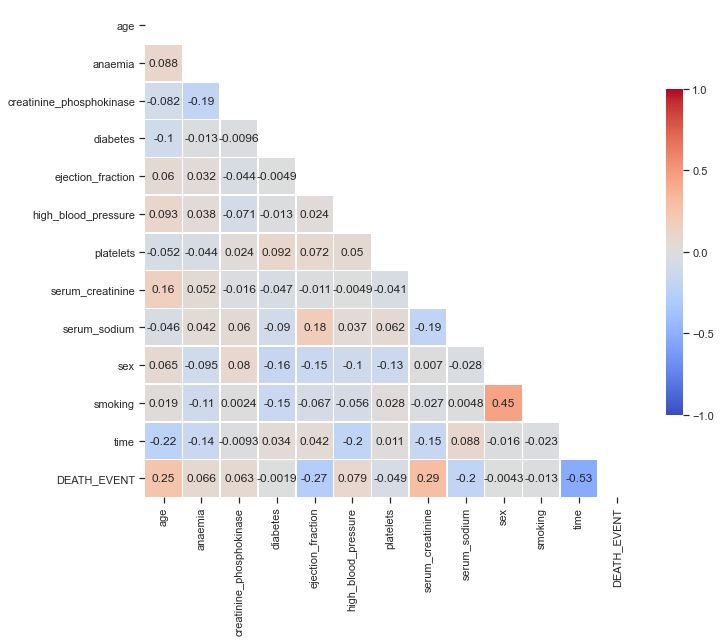

In [31]:
corr_matrix = data.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(11, 15))

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

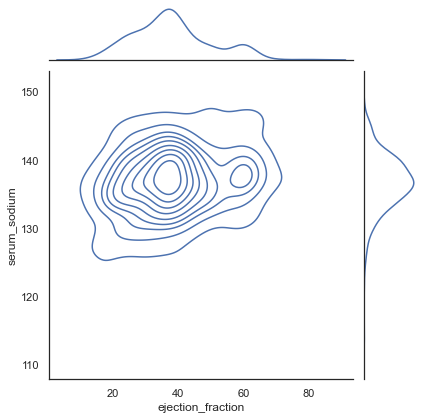

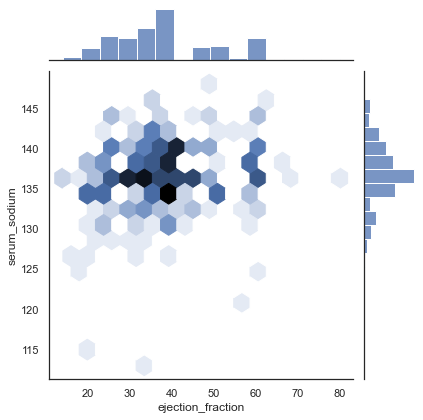

In [29]:
# Inspecting the bi-variate distribution of a single pair of features (ejection_fraction & serum_sodium):

with sns.axes_style('white'):
    sns.jointplot(x='ejection_fraction', y='serum_sodium', data=data, kind='kde');
    
with sns.axes_style('white'):
    sns.jointplot(x='ejection_fraction', y='serum_sodium', data=data, kind='hex');

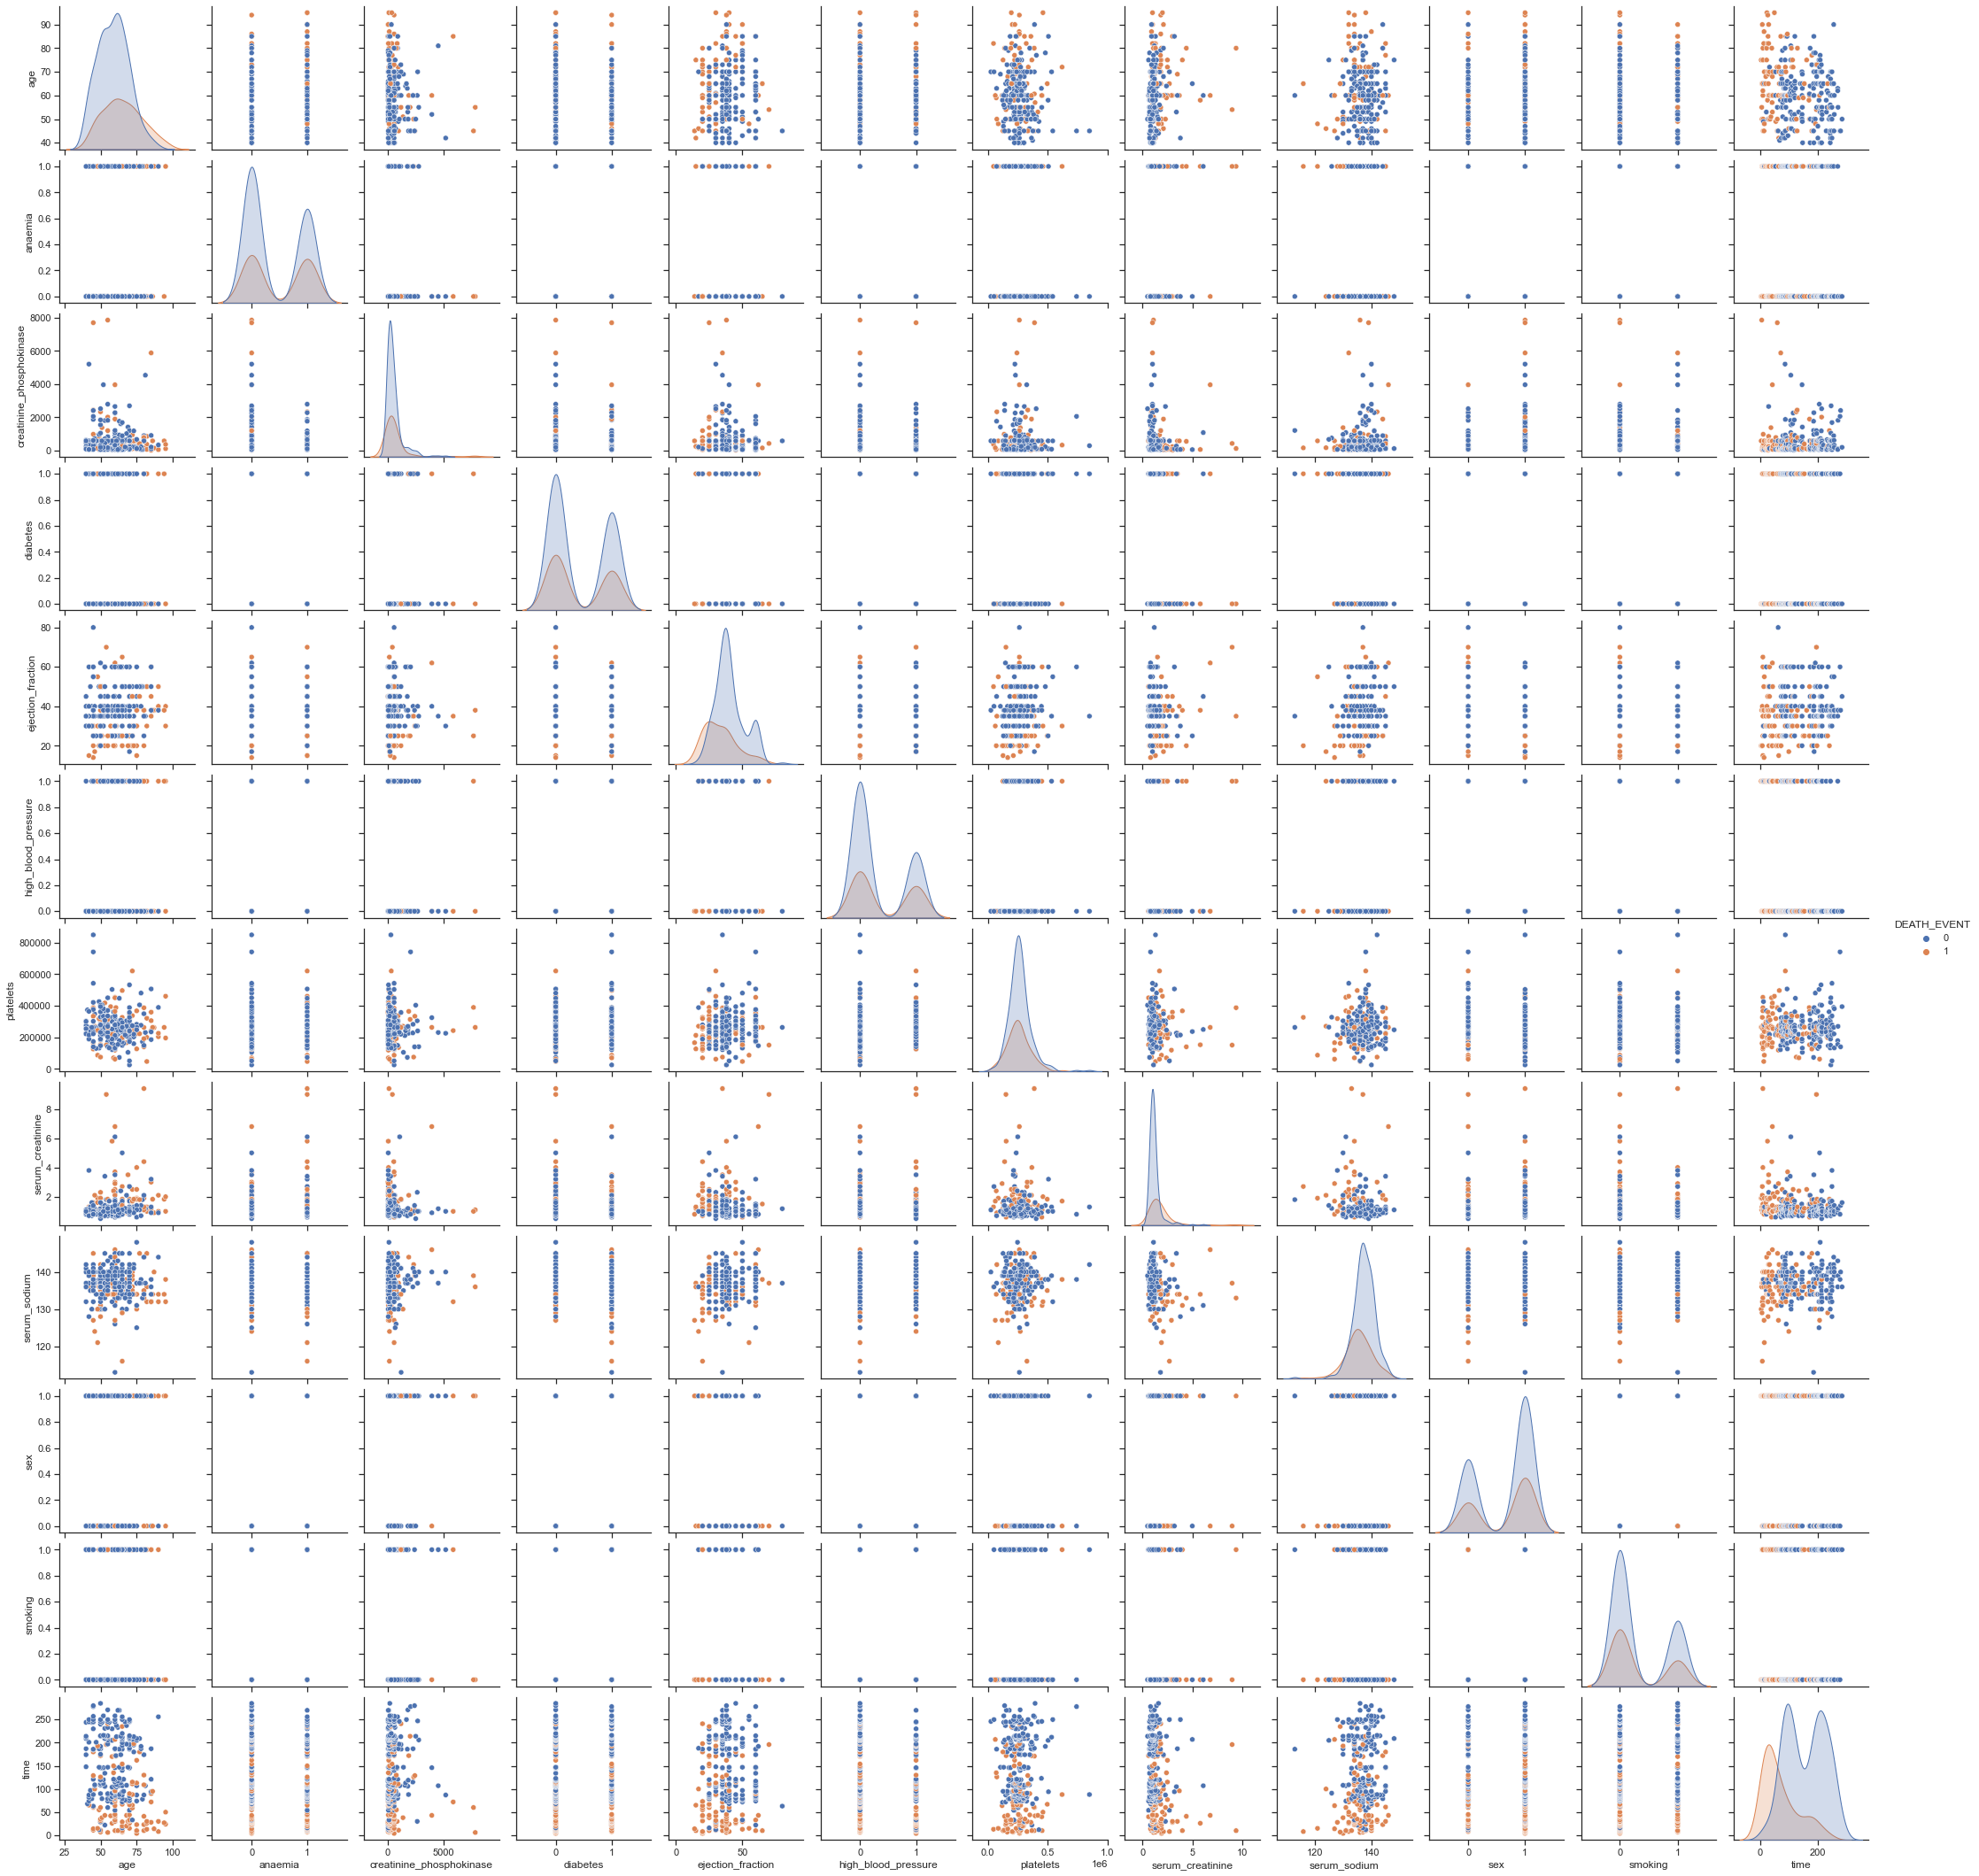

In [30]:
sns.set_theme(style="ticks")
sns.pairplot(data, hue="DEATH_EVENT");